<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Numpy의-polyfit으로-회귀(regression)-분석하기" data-toc-modified-id="Numpy의-polyfit으로-회귀(regression)-분석하기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Numpy의 polyfit으로 회귀(regression) 분석하기</a></span></li><li><span><a href="#Prophet-모듈을-이용한-forecast-예측" data-toc-modified-id="Prophet-모듈을-이용한-forecast-예측-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prophet 모듈을 이용한 forecast 예측</a></span><ul class="toc-item"><li><span><a href="#Prophet" data-toc-modified-id="Prophet-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Prophet</a></span><ul class="toc-item"><li><span><a href="#Prophet-분석-과정" data-toc-modified-id="Prophet-분석-과정-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Prophet 분석 과정</a></span></li></ul></li></ul></li><li><span><a href="#Seasonal-시계열-분석으로-주식-데이터-분석하기" data-toc-modified-id="Seasonal-시계열-분석으로-주식-데이터-분석하기-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Seasonal 시계열 분석으로 주식 데이터 분석하기</a></span><ul class="toc-item"><li><span><a href="#기아-자동차-주식---1" data-toc-modified-id="기아-자동차-주식---1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>기아 자동차 주식 - 1</a></span></li></ul></li><li><span><a href="#기아-자동차-주식---2" data-toc-modified-id="기아-자동차-주식---2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>기아 자동차 주식 - 2</a></span></li><li><span><a href="#Growth-Model과-Holiday-Forecast" data-toc-modified-id="Growth-Model과-Holiday-Forecast-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Growth Model과 Holiday Forecast</a></span></li></ul></div>

In [1]:
# !pip install pystan
# !pip install fbprophet | prophet => error
#==> conda install -c conda-forge fbprophet
# !pip install pandas_datareader

In [2]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np

from fbprophet import Prophet
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 한글 폰트
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 그래프 마이너스 폰트 깨지는 문제 대처
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# Numpy의 polyfit으로 회귀(regression) 분석하기
- pinkwink님의 블로그 웹 트래픽 데이터

In [3]:
pinkwink_web = pd.read_csv('data/08. PinkWink Web Traffic.csv', encoding='utf-8', thousands=',', names =['date','hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


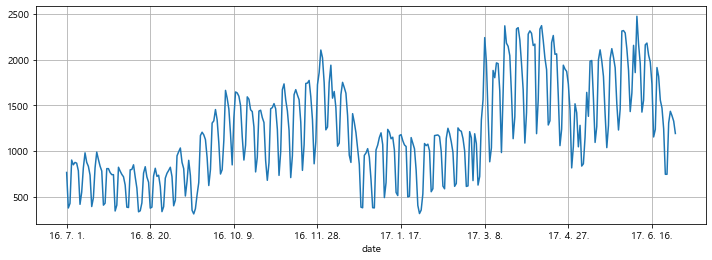

In [4]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True)

- 주기성을 파악하고 싶으나, 그냥 봐서는 확신하기 어려움

In [5]:
time = np.arange(0, len(pinkwink_web))   # 시간축 생성
traffic = pinkwink_web['hit'].values     # 값만 저장

fx = np.linspace(0, time[-1], 1000)

In [6]:
traffic

array([ 766.,  377.,  427.,  902.,  850.,  876.,  868.,  785.,  417.,
        550.,  818.,  981.,  877.,  833.,  737.,  393.,  489.,  817.,
        989.,  908.,  835.,  782.,  408.,  429.,  808.,  808.,  765.,
        742.,  742.,  344.,  408.,  823.,  781.,  745.,  719.,  629.,
        386.,  382.,  795.,  799.,  850.,  717.,  595.,  335.,  346.,
        433.,  759.,  829.,  716.,  659.,  375.,  386.,  727.,  812.,
        723.,  736.,  613.,  337.,  391.,  704.,  757.,  788.,  823.,
        721.,  401.,  463.,  948.,  993., 1034.,  877.,  808.,  508.,
        669.,  899.,  732.,  352.,  312.,  369.,  522.,  655., 1170.,
       1207., 1178., 1126.,  929.,  623.,  799., 1307., 1331., 1455.,
       1342., 1090.,  749.,  797., 1117., 1665., 1579., 1461., 1188.,
        849., 1364., 1648., 1637., 1601., 1499., 1159.,  902., 1066.,
       1594., 1568., 1453., 1433., 1265.,  772.,  932., 1439., 1448.,
       1367., 1313.,  895.,  680.,  872., 1464., 1476., 1520., 1464.,
       1239.,  734.,

In [7]:
# 현재 데이터를 간단한 모델로 표현 하기 -> 회귀(regression) 모델 사용
# 모델을 1,2,3,15차 다항식으로 표현하고 결화 확인해보자

In [8]:
# 모델의 적합성을 확인하려면, 참값/실제값과 비교한 error/오차 계산해야함
# error/오차 함수 정의
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [9]:
f1p = np.polyfit(time, traffic, 1)   # (데이터 x, y, 반환할 다항식 차수)
f1 = np.poly1d(f1p)                 # 다항식 생성 함수

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

# error/오차 확인
print(error(f1, time, traffic))  # 함수, 데이터 x, y
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109626
430.6284101894695
429.53280466762925
330.4777304274343


- 1,2,3 차의 에러/오차 비슷하며, 15차항의 에러/오차가 가작 낮음

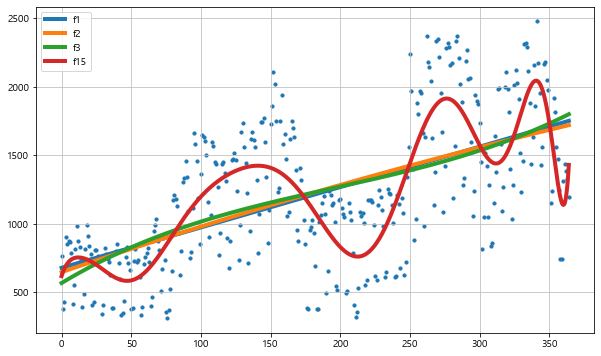

In [10]:
# 해당 결과 시각화
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')
plt.legend(loc='upper left')   # loc = 2
plt.show()

- 1,2,3차 함수 비슷하며, 차라리 1차로 표현하는 것이 나을 수도 있을 것 같음
- 15차 함수를 사용하는 것은 과적합(over-fitting) 위험이 높아보임

# Prophet 모듈을 이용한 forecast 예측

## Prophet

**입력값(input)은 언제나 두개(ds 와 y)의 columns을 가진 데이터프레임(dataframe)**
- ds (datastamp)는 date 나 datetime(둘 중 어느것이어도 괜찮음)을 반드시 포함해야하고, 
- y column은 반드시 numeric하고 우리가 예측하고자하는 값을 나타내어야 합니다.

**예측하는 데에 default값으로 선형모형(linear model) 사용**   
- 예측이 성장하면, 보통 최대 달성 지점(maximum achievable point)인 전체 시장 규모(total market size), 전체 인구 수(total population size) 등이 있습니다. 이건 carrying capacity라고 부르며 예측은 여기에서 충분히 이루어져야(saturate) 합니다.

**명시된 carrying capacity와 함께 로지스틱 성장 추세 모형(logistic growth trend model)을 이용해 예측 가능**     
- cap 행 안에 carrying capacity 를 명시해야합니다. 여기서 특정값을 추정할거지만,  이는 일반적으로 시장 규모(market size)에 대한 데이터나 평가를 이용해 만들어집니다.
- 중요한 건 cap 은 데이터프레임에서 모든 열에 대해 반드시 명시돼 있어야 하고 일정할(constant) 필요가 없다는 점입니다. 만약 시장규모가 성장하면, cap은 증가하는 배열(sequence)이 될 것 입니다.

### Prophet 분석 과정
- ds, y가 담긴 df생성  (y값 로그 변환은 선택적임) 

**모형적합**  
- m = Prophet()
- m.fit(df);      

**예측 기간 설정**  
- future = m.make_future_dataframe(periods=365)    
- future.tail()    

**예측**    
- forecast = m.predict(future)   
- forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()   
    - 예측값인 yhat 행 뿐만 아니라 구성요소(components)를 위한 행과 신뢰구간(uncertainty interval)을 포함하는 새로운 데이터프레임입니다.      

**예측값 확인**   
- m.plot(forecast);    예측값 그려보기
- m.plot_components(forecast);    연간, 주간, 전체적인 트랜드 확인 (공휴일도 가능)

In [11]:
# pinkwink_web data 날짜(index), 방문수(hit) 따로 저장
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format='%y. %m. %d.')  # datetime type으로 변경
del df['date']

In [12]:
df

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0
...,...,...
360,2017-06-26,1309.0
361,2017-06-27,1436.0
362,2017-06-28,1387.0
363,2017-06-29,1328.0


In [13]:
m = Prophet(yearly_seasonality=True)  # 주기성 연단위 설정
m.fit(df);

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
future = m.make_future_dataframe(periods=60)  # 이후 60일간의 데이터 예측 설정  # 날짜 list 더 생성하는 것과 비슷
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [15]:
forecast = m.predict(future)   # 예측한 데이터 forcast에 할당
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-07-01,1061.505143,516.525197,935.323283,1061.505143,1061.505143,-330.306585,-330.306585,-330.306585,-51.449151,-51.449151,-51.449151,-278.857434,-278.857434,-278.857434,0.0,0.0,0.0,731.198557
1,2016-07-02,1062.348012,89.972893,503.156363,1062.348012,1062.348012,-762.226523,-762.226523,-762.226523,-467.420005,-467.420005,-467.420005,-294.806518,-294.806518,-294.806518,0.0,0.0,0.0,300.121488
2,2016-07-03,1063.190881,200.182857,628.166579,1063.190881,1063.190881,-642.967174,-642.967174,-642.967174,-335.292318,-335.292318,-335.292318,-307.674856,-307.674856,-307.674856,0.0,0.0,0.0,420.223707
3,2016-07-04,1064.033750,762.347367,1180.824151,1064.033750,1064.033750,-100.408391,-100.408391,-100.408391,217.275055,217.275055,217.275055,-317.683447,-317.683447,-317.683447,0.0,0.0,0.0,963.625359
4,2016-07-05,1064.876619,774.734339,1220.921527,1064.876619,1064.876619,-71.675456,-71.675456,-71.675456,253.420075,253.420075,253.420075,-325.095532,-325.095532,-325.095532,0.0,0.0,0.0,993.201163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,2017-08-25,1415.510011,698.797815,1112.292689,1415.510000,1415.510020,-507.197526,-507.197526,-507.197526,-51.449151,-51.449151,-51.449151,-455.748375,-455.748375,-455.748375,0.0,0.0,0.0,908.312485
421,2017-08-26,1416.352879,278.754282,697.491926,1416.352869,1416.352889,-923.083011,-923.083011,-923.083011,-467.420005,-467.420005,-467.420005,-455.663006,-455.663006,-455.663006,0.0,0.0,0.0,493.269868
422,2017-08-27,1417.195748,407.821599,833.595715,1417.195737,1417.195757,-791.340209,-791.340209,-791.340209,-335.292318,-335.292318,-335.292318,-456.047891,-456.047891,-456.047891,0.0,0.0,0.0,625.855539
423,2017-08-28,1418.038617,953.702937,1399.716323,1418.038605,1418.038626,-239.541414,-239.541414,-239.541414,217.275055,217.275055,217.275055,-456.816469,-456.816469,-456.816469,0.0,0.0,0.0,1178.497203


In [16]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,908.312485,698.797815,1112.292689
421,2017-08-26,493.269868,278.754282,697.491926
422,2017-08-27,625.855539,407.821599,833.595715
423,2017-08-28,1178.497203,953.702937,1399.716323
424,2017-08-29,1214.444999,1013.842400,1416.795350


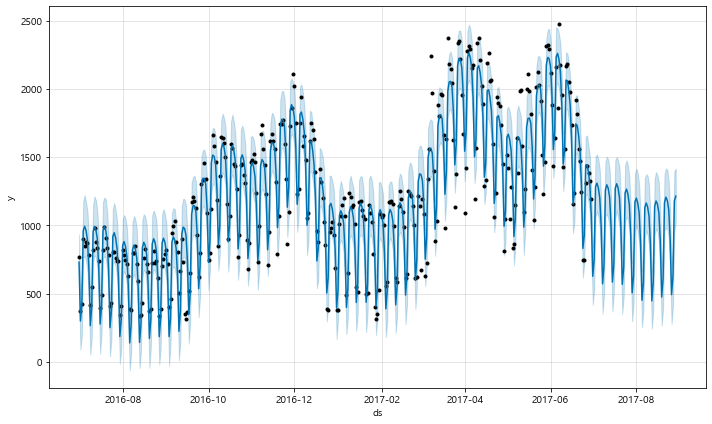

In [17]:
m.plot(forecast);

- 2017년 6월 말 데이터 이후, 약 2개월(60일)의 예측 결과가 나타남

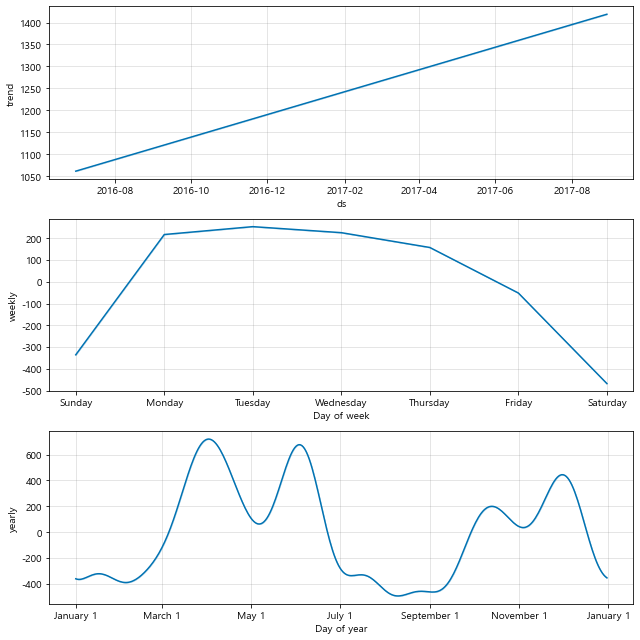

In [18]:
m.plot_components(forecast);

- 전체적인 경향은 직선으로 표현됨
- 요일별 그래프를 보면, 월, 화, 수 방문자가 가장 많은 것을 알 수 있음
- 연간 데이터 경향을 보면, 5월을 제외한 3,4,6월에  방문자가 높게 나타나며, 이후에는 감소하는 경향을 보이다 9~12월 다시 증가함
    - 대학교 개강 후 중간고사, 기발고사, 방학 주기와 비슷함을 짐작할 수 있음

# Seasonal 시계열 분석으로 주식 데이터 분석하기
- Pandas 라이브러리의 DataReader 함수로 구글이 제공하는 주가 정보를 받아올 수 있음 (종목코드로 검색 ex. 한국: kospi)

## 기아 자동차 주식 - 1

In [19]:
start = datetime(2003, 1, 1)
end = datetime(2017, 6, 30)

# 기아자동차 주식
KIA = web.DataReader('000270.KS', 'yahoo', start, end)   # google 사용 중단됨 -> yahoo 사용  # KRX:000270 -> 000270.KS
KIA

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-06-18,80500,79300,79400,80000,1758207,80000
2012-06-19,80400,79500,80000,80000,1075002,80000
2012-06-20,81000,79600,80900,80000,885863,80000
2012-06-21,80300,78700,79700,78800,787586,78800
2012-06-22,78200,77200,77900,77500,1091383,77500
...,...,...,...,...,...,...
2017-06-26,39000,38450,38800,38650,439880,38650
2017-06-27,38550,37850,38550,38000,896530,38000
2017-06-28,38300,37600,38000,37850,749536,37850


- 교재는 2003년 데이터 부터 존재하지만, 현재기준 불러올 수 있는 데이터는 2012년 부터임

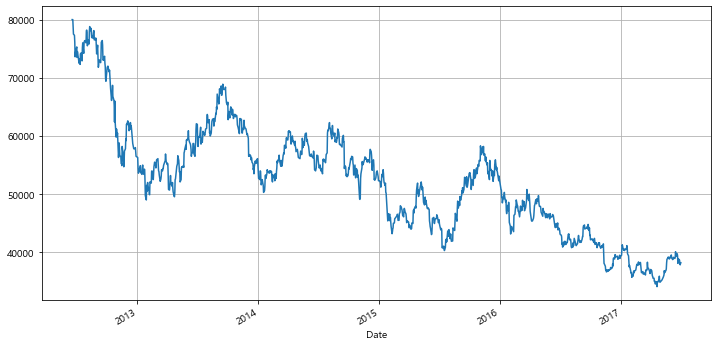

In [20]:
# 종가 기준으로 그래프 그려보기
KIA['Close'].plot(figsize=(12,6), grid=True)

- 전체적으로 하락하는 추세가 나타남

In [21]:
# '2016-12-31'까지 잘라 모델 학습에 사용하고, 이후 데이터는 예측 성능 평가에 활용할 예정
KIA_trunc = KIA[:'2016-12-31']
KIA_trunc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-06-18,80500,79300,79400,80000,1758207,80000
2012-06-19,80400,79500,80000,80000,1075002,80000
2012-06-20,81000,79600,80900,80000,885863,80000
2012-06-21,80300,78700,79700,78800,787586,78800
2012-06-22,78200,77200,77900,77500,1091383,77500
...,...,...,...,...,...,...
2016-12-23,39350,38650,38700,39100,1070783,39100
2016-12-26,39350,38850,39100,39000,465612,39000
2016-12-27,39700,39050,39050,39500,879686,39500


In [22]:
# 이전 블로그 웹 트래픽 분석과 같이, 별도로 데이터 프레임 생성
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})   # 종가만
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2012-06-18,80000
1,2012-06-19,80000
2,2012-06-20,80000
3,2012-06-21,78800
4,2012-06-22,77500


In [23]:
# 1년 후, 2017-12-31 까지의 정보 예측
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1482,2017-12-25
1483,2017-12-26
1484,2017-12-27
1485,2017-12-28
1486,2017-12-29


In [25]:
forecast = m.predict(future)   # 예측한 데이터 forcast에 할당
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1482,2017-12-25,18889.581405,1448.068596,34926.268345
1483,2017-12-26,18885.104903,1452.797855,36015.299301
1484,2017-12-27,18696.659092,1153.520729,35420.469833
1485,2017-12-28,18494.626329,1210.364596,36043.777965
1486,2017-12-29,18273.375772,517.966979,35898.889048


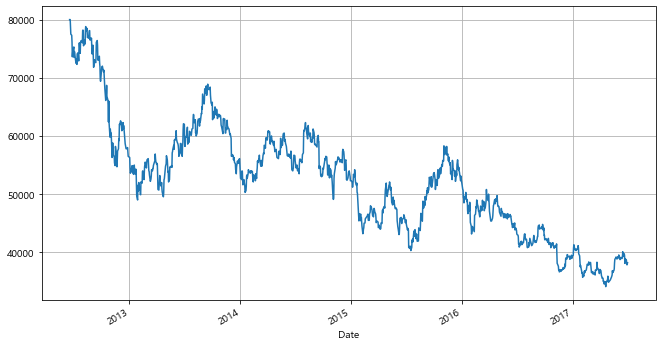

In [26]:
KIA['Close'].plot(figsize=(11,6), grid=True)

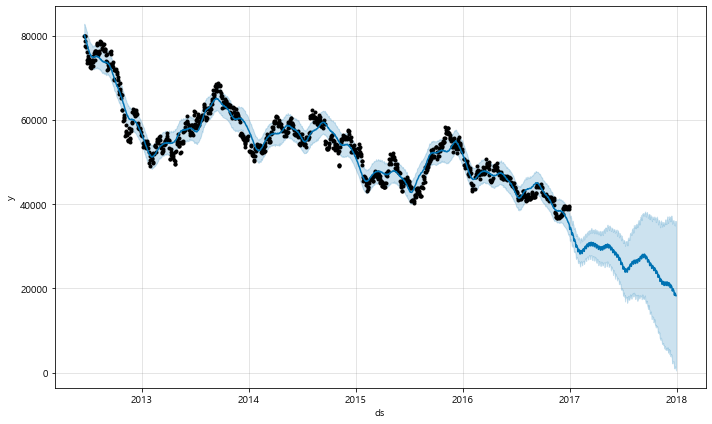

In [27]:
m.plot(forecast);

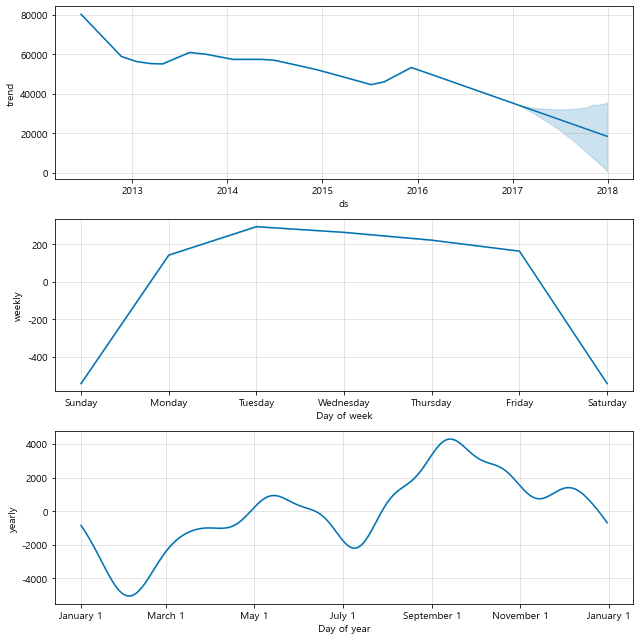

In [28]:
# 요소별 확인
m.plot_components(forecast);

- 전체적인 트랜드는 중간에 일부 증가하는 구간이 있지만, 전반적으로 감소하는 경향을 보임
- 주간 데이터를 보면, 화요일 수요일에 비교적 높은 주가가 나타남 (토,일은 장이 서지 않음)
- 연간 데이터를 보면, 2월에 가장 낮은 주가를 보이며, 9월에 가장 높게 나타남

# 기아 자동차 주식 - 2
- 주가 날짜 범위 수정됨
- 예측용 데이터는 20140101~20170531까지

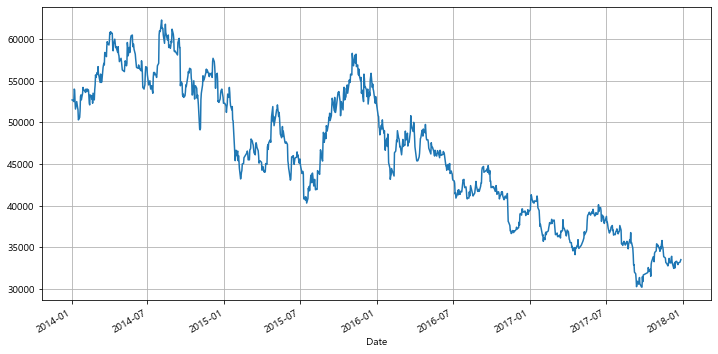

In [29]:
start = datetime(2014, 1, 1)
end = datetime(2017, 12, 31)

KIA = web.DataReader('000270.KS', 'yahoo', start, end)
KIA['Close'].plot(figsize=(12,6), grid=True)

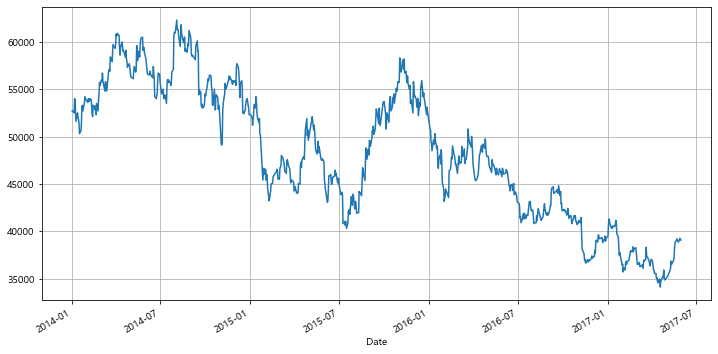

In [30]:
KIA_trunc = KIA[:'2017-05-31']
KIA_trunc['Close'].plot(figsize=(12,6), grid=True)

In [31]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

In [32]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
# 214일간의 데이터 예측
future = m.make_future_dataframe(periods=214)
future.tail()

,ds
1050,2017-12-27
1051,2017-12-28
1052,2017-12-29
1053,2017-12-30
1054,2017-12-31


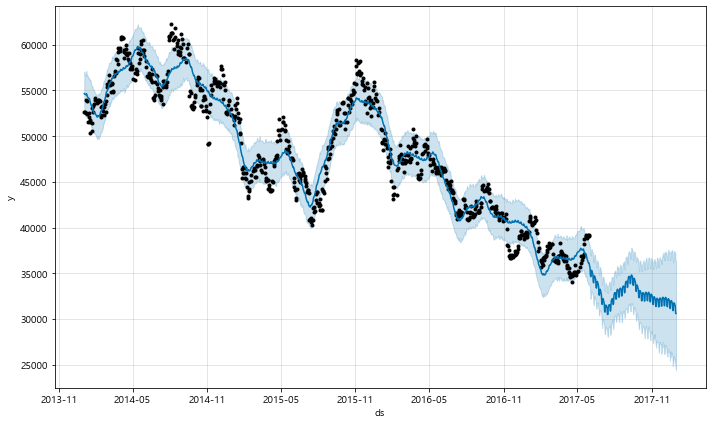

In [34]:
forecast = m.predict(future)
m.plot(forecast);

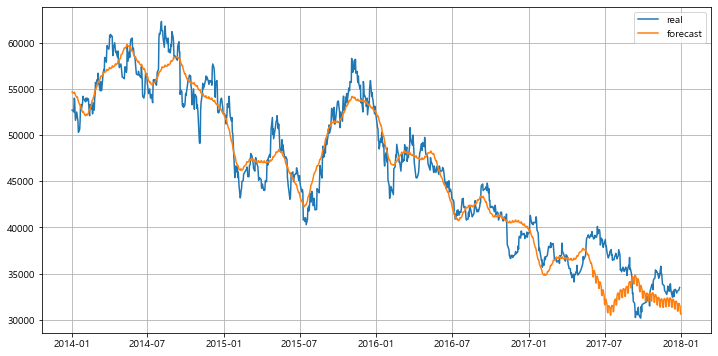

In [35]:
# 실제값과 비교 해보기
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'], label='real')   # 실제값
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')   # 예측값
plt.grid(True)
plt.legend()
plt.show()

- 2016년 11월 부터 예측값의 오차가 커짐

# Growth Model과 Holiday Forecast
- prophet 튜토리얼에 나오는 예제

In [47]:
df = pd.read_csv('data/08. example_wp_R.csv')
df

,ds,y
0,2008-01-30,394
1,2008-01-16,424
2,2008-01-17,408
3,2008-01-14,385
4,2008-01-15,369
...,...,...
2858,2015-12-11,2527
2859,2015-12-12,1572
2860,2015-12-13,1772
2861,2015-12-18,2357


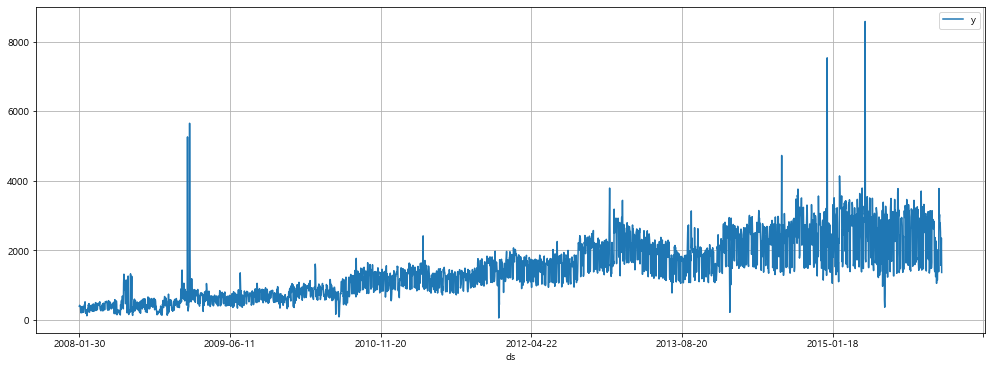

In [52]:
df2 = df.copy()
df2.set_index('ds', inplace=True)
df2.plot(figsize=(17,6), grid=True)

In [53]:
# y값 log변환
df['y'] = np.log(df['y'])
df

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797
...,...,...
2858,2015-12-11,7.834788
2859,2015-12-12,7.360104
2860,2015-12-13,7.479864
2861,2015-12-18,7.765145


In [54]:
df['cap'] = 8.5

In [55]:
# 로지스틱 성장 추세 모형(logistic growth trend model)을 이용해 예측  <- 주기성을 띠면서 점점 성장하는 모습의 데이터 
m = Prophet(growth='logistic')
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


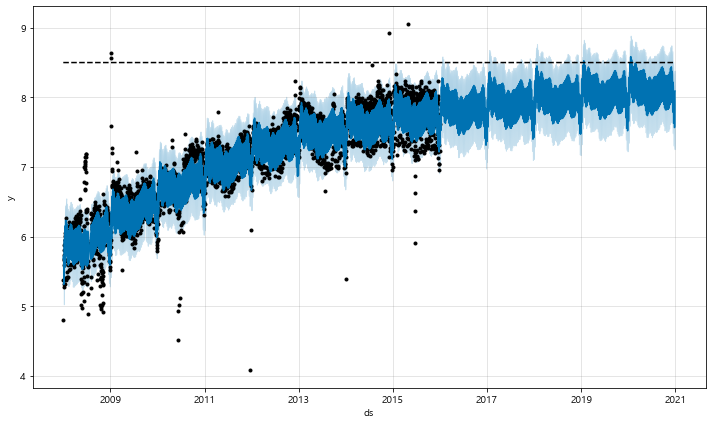

In [57]:
future = m.make_future_dataframe(periods=1826)   # 3년(1826일)간의 데이터 예측
future['cap'] = 8.5
fcst = m.predict(future)   # forecast
m.plot(fcst);

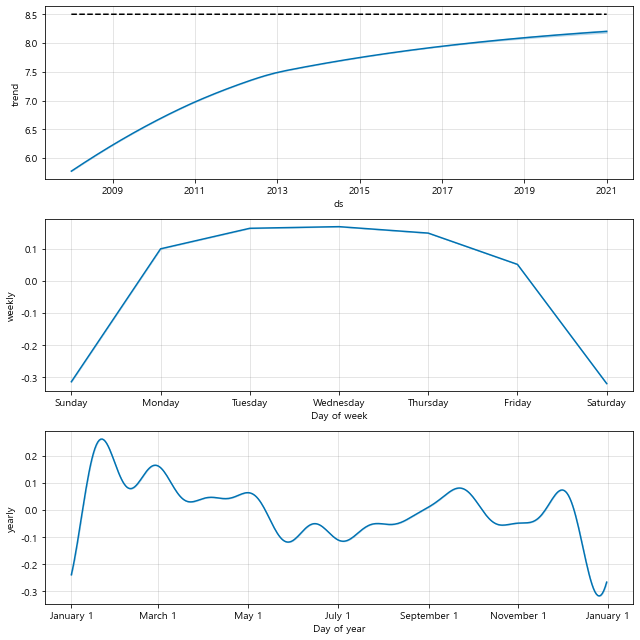

In [61]:
forecast = m.predict(future)
m.plot_components(forecast);

- 전체적으로 증가하는 추세가 나타남
- 주간 그래프를 보면, 화, 수, 목에 비교적 높은 주가를 보임
- 2월달에 가장 높은 주가가 나타나며, 1월에 가장 낮은 것을 알 수 있음